## Prediccion de Covid - Javier Cabrera, 201403905

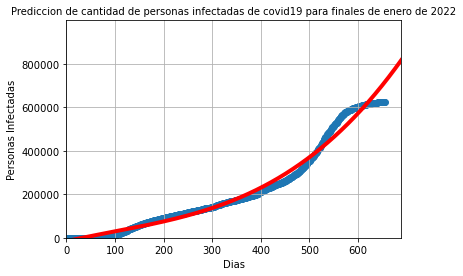

In [1]:
# Repositorio: https://github.com/cabreraction/Tareas_IA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

days = np.asarray([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655])[:,np.newaxis]
infected = np.asarray([0,1,1,2,6,6,9,12,17,19,20,21,24,25,28,34,34,36,38,39,47,50,61,61,70,77,87,95,126,137,155,156,167,180,196,214,235,257,289,294,316,384,430,473,500,530,530,557,599,644,688,703,730,763,798,832,900,967,1052,1114,1199,1342,1518,1643,1763,1763,1912,2133,2265,2512,2743,3054,3424,3760,3954,4145,4348,4607,4739,5087,5336,5586,5760,6154,6485,6792,7055,7502,7866,8221,8561,8982,9491,9845,10272,10706,11251,11868,12509,12755,13145,13769,14540,14819,15619,15828,16397,16930,17409,18096,19011,20072,21293,22501,23248,23972,24787,25411,26658,27619,28598,29355,29742,30872,32074,32939,33809,38042,38677,39039,40229,41135,42192,43283,44492,45053,45309,46451,47605,48826,49789,50979,51306,51542,52365,53509,54339,55270,56189,56605,56987,57966,59089,60284,61428,62313,62562,62944,63847,64881,65983,66941,67856,68188,68533,69651,70714,71856,72921,73679,73912,74074,74893,75644,76358,77040,77481,77683,77828,78721,79622,80306,81009,81658,81909,82172,82684,82924,83664,84344,85152,85444,85681,86623,87442,87933,88878,89702,90092,90263,90968,91746,92409,93090,93748,93963,94182,94870,95704,96480,96935,97544,97715,97826,98380,99094,99765,100431,101028,101360,101599,102219,102415,103172,103902,104632,104787,104894,105571,106320,106790,107339,107939,108104,108104,108483,109147,109849,110502,111050,111262,111360,112129,112811,113543,114123,114719,114885,115032,115730,116381,117066,117757,118417,118629,118722,119349,119989,120685,121132,121798,121971,122062,122774,123460,124053,124805,125352,125550,125674,126473,127127,127786,128541,129099,129282,129405,130082,130828,131435,132062,132595,132765,132867,133601,134256,134894,135080,135171,135309,135441,136287,137166,138012,138236,138316,138475,138656,139419,140202,141074,142064,143127,143243,143243,144982,145986,146937,147560,148598,148888,149146,150277,151324,152395,152956,153890,154212,154430,155459,156497,157595,158336,159118,159504,159632,160299,160966,161665,162295,162937,163137,163247,163993,164746,165532,166283,167071,167279,167383,168103,168880,169610,170275,170931,171170,171289,172072,172764,173142,173814,174335,174542,174653,175411,176250,176876,177716,178337,178560,178770,179563,180393,181143,181974,182679,182881,183014,183985,184934,185832,186740,187659,187911,188119,189067,190208,191207,192133,193050,193377,193556,193834,193834,194756,195036,195239,195471,195680,197020,198374,199964,201295,202640,203071,203309,205322,207127,208694,210667,212307,212734,213049,214700,216329,218145,219789,221307,221698,221939,223025,224621,226247,227671,228477,228684,228871,230095,231289,232439,233696,234883,235098,235304,236266,237682,238787,240170,241117,241369,241528,242784,243833,245247,246156,247106,247454,247644,248824,250296,251336,252929,253837,254225,254417,255833,257167,258633,259954,261392,261958,262255,263836,265662,267447,269308,271131,271703,271990,273730,275202,276927,278409,279947,280507,280854,282713,284741,286708,288987,290852,291595,291977,292674,293583,296438,298904,301189,302012,302534,305319,308273,311342,314302,317311,318541,319157,322120,325024,327755,330651,333126,333827,334375,337762,340857,344221,347496,350816,352088,352584,355223,358798,362134,365528,368484,369626,370258,373047,377446,381514,385512,389510,390514,391118,394372,398990,403348,407564,411731,413040,413797,417620,422270,428096,433339,437919,439253,440007,444924,450150,455263,460017,463753,465059,465799,470277,475548,479376,484263,486819,487898,488538,492570,497690,500840,505640,509654,510724,511457,515756,519986,521093,525161,528588,529422,530026,533744,537987,542024,545796,548604,549560,550333,553289,557244,560315,563257,565566,566250,566636,569440,572103,574713,576818,578809,579489,579774,581498,583201,584613,586318,587687,588069,588262,589986,591460,591767,593459,594665,595008,595067,596417,597768,599042,600419,601402,601572,601657,601793,602575,603641,604586,605415,605664,605749,606743,607497,608307,609136,609729,610004,610034,610591,611374,611374,613014,613713,613892,613950,614910,615725,616554,617037,617495,617610,617621,617984,618436,618727,619040,619542,619852,619891,620435,620853,621328,621844,622168,622229,622237,622525,622866,623195,623449,623662,623731,623795,624171,624544,624866,625029,625127,625166,625257,625854])[:,np.newaxis]
plt.scatter(days, infected)

polynomial_features = PolynomialFeatures(degree = 3)
days_transform = polynomial_features.fit_transform(days)

model = LinearRegression().fit(days_transform, infected)
infected_new = model.predict(days_transform)

days_new = np.linspace(0.0, 689.0, 690)
days_new = days_new[:,np.newaxis]

days_new_transform = polynomial_features.fit_transform(days_new)
infected_new = model.predict(days_new_transform)

plt.plot(days_new, infected_new, color='red', linewidth=4)
plt.grid()
plt.xlim(0.0,689.0)
plt.ylim(0,999999)
plt.title("Prediccion de cantidad de personas infectadas de covid19 para finales de enero de 2022", fontsize=10)
plt.ylabel('Personas Infectadas')
plt.xlabel('Dias')
plt.show()